In [72]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Statement:

**Apply Data Cleaning to the Datasets and then apply Kmeans algorithm for find pattern and the best value of the K for the following features.**

1. Use feautes fixed acidity and volatile acidity
2. Use feautes Cirtic acidity and fixed acidity
3. Use feautes residual suger and sulphades
4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide
5. Use feautes fixed acidity, citric acidity and volatile acidity
5. Use feautes density and pH


# About the Data 
Input variables (based on physicochemical tests):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol
* Output variable (based on sensory data):
* 12 - quality (score between 0 and 10)

## Loading the data:

In [73]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [75]:
dff = df.iloc[:,0:11]
dff.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


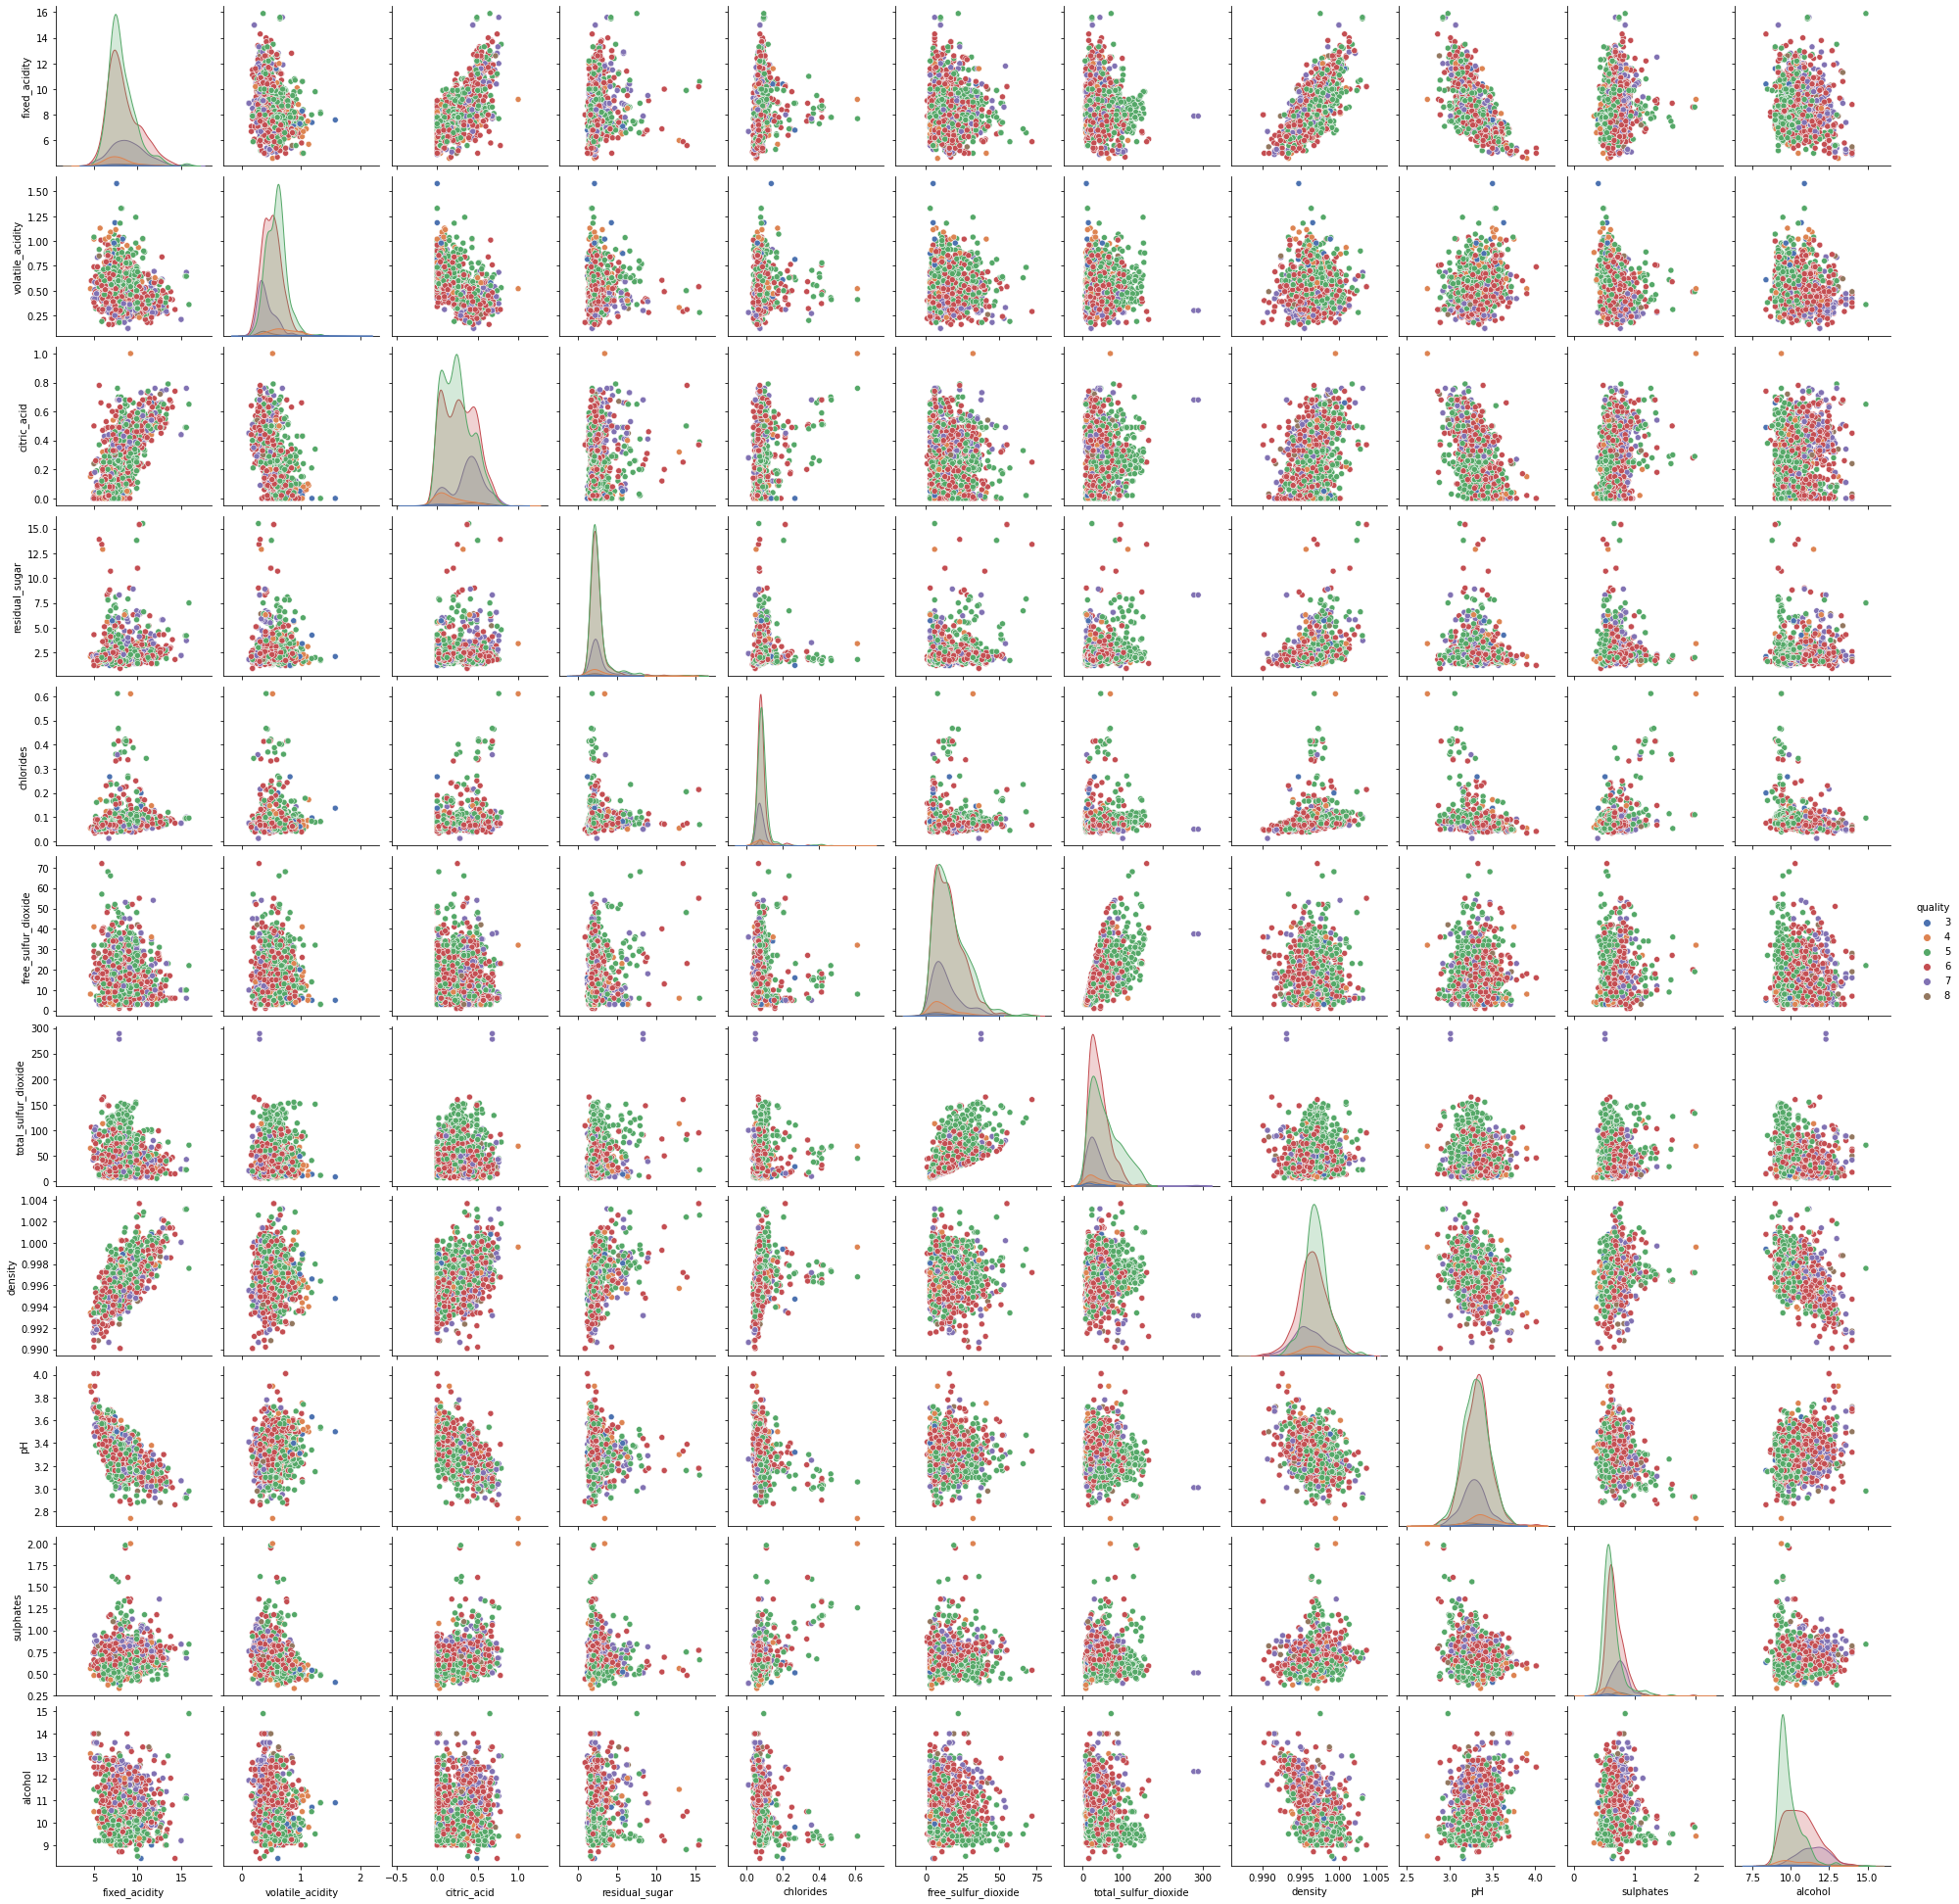

In [77]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',palette='deep',hue='quality')

## Data cleaning.

### checking the shape of the dataset.

In [78]:
df.shape

(1599, 12)

### checking for the null values.

In [79]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### There are no null values in the dataset.

# `With Scaling of the data.`

## 1. Use feautes fixed acidity and volatile acidity

In [202]:
df_scaled = df.copy()

df_scaled = df_scaled.apply(zscore)

df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [203]:
df1_scaled = df_scaled[['fixed_acidity','volatile_acidity']]
df1_scaled.head(2)

,fixed_acidity,volatile_acidity
0,-0.528360,0.961877
1,-0.298547,1.967442


In [204]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df1_scaled)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [205]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,3198.000000
1,2,1855.095229
2,3,1237.913615
3,4,976.949243
4,5,810.969698


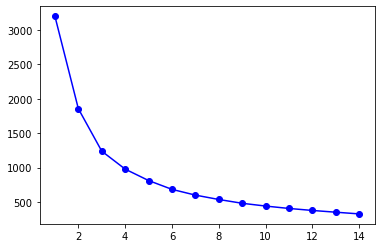

In [206]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=4 the interia significantly decreases, the best value of K is 4.

In [207]:
## building the K-means clustering model with best K value 4.
kmeans = KMeans(n_clusters=4, n_init=10, random_state=100)

kmeans.fit(df1_scaled)

KMeans(n_clusters=4, random_state=100)

In [208]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [209]:
## joining the dataframes.
df1_scaled = df1_scaled.join(df_label)

In [210]:
df1_scaled.head()

,fixed_acidity,volatile_acidity,label
0,-0.528360,0.961877,0
1,-0.298547,1.967442,1
2,-0.298547,1.297065,1
3,1.654856,-1.384443,3
4,-0.528360,0.961877,0


In [211]:
df1_scaled['label'].value_counts()

0    615
2    421
3    326
1    237
Name: label, dtype: int64

## 2. Use feautes Cirtic acidity and fixed acidity

In [212]:
df_scaled.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823


In [213]:
df2_scaled = df_scaled[['citric_acid','fixed_acidity']]
df2_scaled.head(2)

,citric_acid,fixed_acidity
0,-1.391472,-0.528360
1,-1.391472,-0.298547


In [214]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df2_scaled)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [215]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,3198.000000
1,2,1349.582779
2,3,861.704601
3,4,680.668631
4,5,558.086597


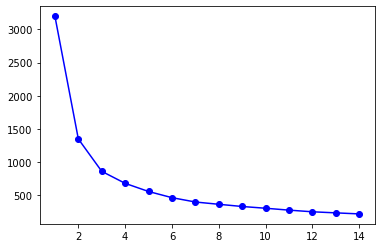

In [216]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [318]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df2_scaled)

KMeans(n_clusters=3, random_state=100)

In [321]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [324]:
## joining the dataframes.
df2_scaled = df2_scaled.join(df_label)

In [325]:
df2_scaled.head()

,citric_acid,fixed_acidity,label
0,-1.391472,-0.528360,2
1,-1.391472,-0.298547,2
2,-1.186070,-0.298547,2
3,1.484154,1.654856,0
4,-1.391472,-0.528360,2


In [326]:
df2_scaled['label'].value_counts()

2    666
1    632
0    301
Name: label, dtype: int64

## 3.Use feautes residual suger and sulphades

In [222]:
df3_scaled = df_scaled[['residual_sugar','sulphates']]
df3_scaled.head()

,residual_sugar,sulphates
0,-0.453218,-0.579207
1,0.043416,0.128950
2,-0.169427,-0.048089
3,-0.453218,-0.461180
4,-0.453218,-0.579207


In [223]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df3_scaled)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [224]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,3198.000000
1,2,2177.114997
2,3,1312.577756
3,4,998.171164
4,5,739.727610


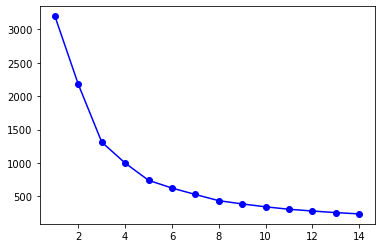

In [225]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=4 the interia significantly decreases, the best value of K is 4.

In [226]:
## building the K-means clustering model with best K value 4.
kmeans = KMeans(n_clusters=4, n_init=10, random_state=100)

kmeans.fit(df3_scaled)

KMeans(n_clusters=4, random_state=100)

In [227]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [228]:
## joining the dataframes.
df3_scaled = df3_scaled.join(df_label)

In [229]:
df3_scaled.head()

,residual_sugar,sulphates,label
0,-0.453218,-0.579207,3
1,0.043416,0.128950,2
2,-0.169427,-0.048089,3
3,-0.453218,-0.461180,3
4,-0.453218,-0.579207,3


In [230]:
df3_scaled['label'].value_counts()

3    994
2    466
1     82
0     57
Name: label, dtype: int64

## 4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [231]:
df4_scaled = df_scaled[['free_sulfur_dioxide','total_sulfur_dioxide']]
df4_scaled.head()

,free_sulfur_dioxide,total_sulfur_dioxide
0,-0.466193,-0.379133
1,0.872638,0.624363
2,-0.083669,0.229047
3,0.107592,0.411500
4,-0.466193,-0.379133


In [232]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df4_scaled)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [233]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,3198.000000
1,2,1363.153068
2,3,975.672315
3,4,740.648461
4,5,560.536607


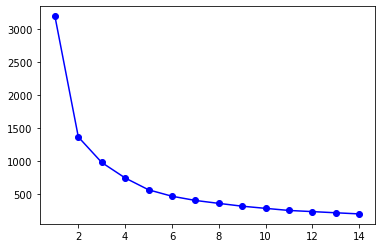

In [234]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [235]:
## building the K-means clustering model with best K value 4.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df4_scaled)

KMeans(n_clusters=3, random_state=100)

In [236]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [237]:
## joining the dataframes.
df4_scaled = df4_scaled.join(df_label)

In [238]:
df4_scaled.head()

,free_sulfur_dioxide,total_sulfur_dioxide,label
0,-0.466193,-0.379133,0
1,0.872638,0.624363,2
2,-0.083669,0.229047,2
3,0.107592,0.411500,2
4,-0.466193,-0.379133,0


In [239]:
df4_scaled['label'].value_counts()

0    836
2    539
1    224
Name: label, dtype: int64

## 5. Use feautes fixed acidity, citric acidity and volatile acidity

In [240]:
df5_scaled = df_scaled[['fixed_acidity','citric_acid','volatile_acidity']]
df5_scaled.head()

,fixed_acidity,citric_acid,volatile_acidity
0,-0.528360,-1.391472,0.961877
1,-0.298547,-1.391472,1.967442
2,-0.298547,-1.186070,1.297065
3,1.654856,1.484154,-1.384443
4,-0.528360,-1.391472,0.961877


In [241]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df5_scaled)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [242]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,4797.000000
1,2,2494.163904
2,3,1857.150111
3,4,1534.117044
4,5,1297.589118


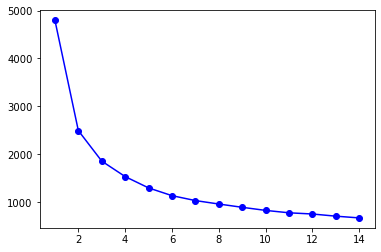

In [243]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [244]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df5_scaled)

KMeans(n_clusters=3, random_state=100)

In [245]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [246]:
## joining the dataframes.
df5_scaled = df5_scaled.join(df_label)

In [247]:
df5_scaled.head()

,fixed_acidity,citric_acid,volatile_acidity,label
0,-0.528360,-1.391472,0.961877,1
1,-0.298547,-1.391472,1.967442,1
2,-0.298547,-1.186070,1.297065,1
3,1.654856,1.484154,-1.384443,2
4,-0.528360,-1.391472,0.961877,1


In [248]:
df5_scaled['label'].value_counts()

1    749
0    528
2    322
Name: label, dtype: int64

## 6. Use features density and pH.

In [249]:
df6_scaled = df[['density','pH']]
df6_scaled.head()

,density,pH
0,0.9978,3.51
1,0.9968,3.20
2,0.9970,3.26
3,0.9980,3.16
4,0.9978,3.51


In [250]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df6_scaled)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [251]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,38.094311
1,2,15.138756
2,3,8.028614
3,4,5.193878
4,5,3.583777


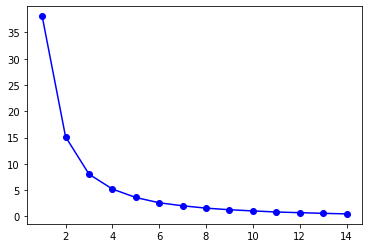

In [252]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [253]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df6_scaled)

KMeans(n_clusters=3, random_state=100)

In [254]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [255]:
## joining the dataframes.
df6_scaled = df6_scaled.join(df_label)

In [256]:
df6_scaled.head()

,density,pH,label
0,0.9978,3.51,2
1,0.9968,3.20,1
2,0.9970,3.26,0
3,0.9980,3.16,1
4,0.9978,3.51,2


In [257]:
df6_scaled['label'].value_counts()

0    801
1    495
2    303
Name: label, dtype: int64

# `Without Scaling`

## 1. Use feautes fixed acidity and volatile acidity

In [258]:
df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [259]:
df1 = df[['fixed_acidity','volatile_acidity']]
df1.head(2)

,fixed_acidity,volatile_acidity
0,7.4,0.70
1,7.8,0.88


In [260]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df1)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [261]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,4895.439069
1,2,1685.380926
2,3,937.755964
3,4,597.770260
4,5,418.870814


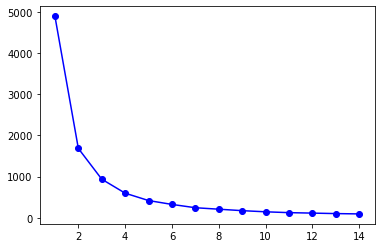

In [262]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [264]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df1)

KMeans(n_clusters=3, random_state=100)

In [265]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [266]:
## joining the dataframes.
df1 = df1.join(df_label)

In [267]:
df1.head()

,fixed_acidity,volatile_acidity,label
0,7.4,0.70,1
1,7.8,0.88,1
2,7.8,0.76,1
3,11.2,0.28,2
4,7.4,0.70,1


In [268]:
df1['label'].value_counts()

1    816
0    559
2    224
Name: label, dtype: int64

## 2. Use feautes Cirtic acidity and fixed acidity

In [328]:
df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [329]:
df2 = df[['citric_acid','fixed_acidity']]
df2.head(2)

,citric_acid,fixed_acidity
0,0.0,7.4
1,0.0,7.8


In [330]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df2)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [331]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,4904.843468
1,2,1678.046296
2,3,924.800502
3,4,582.381199
4,5,405.603258


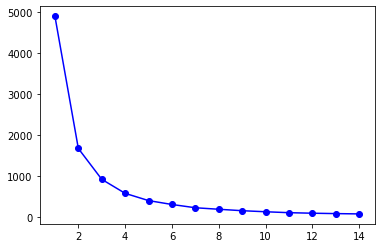

In [332]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [333]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df2)

KMeans(n_clusters=3, random_state=100)

In [334]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [335]:
## joining the dataframes.
df2 = df2.join(df_label)

In [336]:
df2.head()

,citric_acid,fixed_acidity,label
0,0.00,7.4,1
1,0.00,7.8,1
2,0.04,7.8,1
3,0.56,11.2,2
4,0.00,7.4,1


In [337]:
df2['label'].value_counts()

1    858
0    528
2    213
Name: label, dtype: int64

## 3.Use feautes residual suger and sulphades

In [338]:
df3 = df[['residual_sugar','sulphates']]
df3.head()

,residual_sugar,sulphates
0,1.9,0.56
1,2.6,0.68
2,2.3,0.65
3,1.9,0.58
4,1.9,0.56


In [339]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df3)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [340]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,3222.574339
1,2,1194.822822
2,3,641.931204
3,4,397.132526
4,5,264.102823


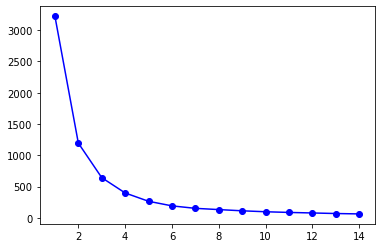

In [341]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [342]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df3)

KMeans(n_clusters=3, random_state=100)

In [343]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [344]:
## joining the dataframes.
df3 = df3.join(df_label)

In [345]:
df3.head()

,residual_sugar,sulphates,label
0,1.9,0.56,0
1,2.6,0.68,0
2,2.3,0.65,0
3,1.9,0.58,0
4,1.9,0.56,0


In [346]:
df3['label'].value_counts()

0    1457
1     131
2      11
Name: label, dtype: int64

## 4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [347]:
df4 = df[['free_sulfur_dioxide','total_sulfur_dioxide']]
df4.head()

,free_sulfur_dioxide,total_sulfur_dioxide
0,11.0,34.0
1,25.0,67.0
2,15.0,54.0
3,17.0,60.0
4,11.0,34.0


In [348]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df4)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [349]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,1.904045e+06
1,2,6.821269e+05
2,3,3.855893e+05
3,4,2.734129e+05
4,5,2.115896e+05


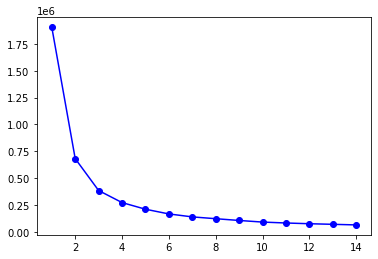

In [350]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [351]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df4)

KMeans(n_clusters=3, random_state=100)

In [352]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [353]:
## joining the dataframes.
df4 = df4.join(df_label)

In [354]:
df4.head()

,free_sulfur_dioxide,total_sulfur_dioxide,label
0,11.0,34.0,0
1,25.0,67.0,2
2,15.0,54.0,2
3,17.0,60.0,2
4,11.0,34.0,0


In [355]:
df4['label'].value_counts()

0    810
2    546
1    243
Name: label, dtype: int64

## 5. Use feautes fixed acidity, citric acidity and volatile acidity

In [356]:
df5 = df[['fixed_acidity','citric_acid','volatile_acidity']]
df5.head()

,fixed_acidity,citric_acid,volatile_acidity
0,7.4,0.00,0.70
1,7.8,0.00,0.88
2,7.8,0.04,0.76
3,11.2,0.56,0.28
4,7.4,0.00,0.70


In [357]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df5)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [358]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,4956.079147
1,2,1726.237162
2,3,972.314888
3,4,630.280182
4,5,452.334400


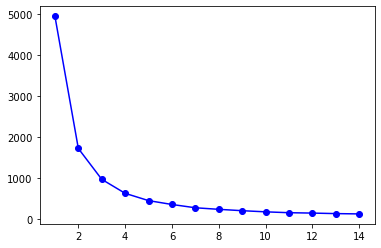

In [359]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [360]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df5)

KMeans(n_clusters=3, random_state=100)

In [361]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [362]:
## joining the dataframes.
df5 = df5.join(df_label)

In [363]:
df5.head()

,fixed_acidity,citric_acid,volatile_acidity,label
0,7.4,0.00,0.70,0
1,7.8,0.00,0.88,0
2,7.8,0.04,0.76,0
3,11.2,0.56,0.28,1
4,7.4,0.00,0.70,0


In [364]:
df5['label'].value_counts()

0    816
2    559
1    224
Name: label, dtype: int64

## 6. Use features density and pH.

In [306]:
df6 = df[['density','pH']]
df6.head()

,density,pH
0,0.9978,3.51
1,0.9968,3.20
2,0.9970,3.26
3,0.9980,3.16
4,0.9978,3.51


In [307]:
cluster_errors = []
cluster_range = range(1,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df6)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})    

In [308]:
cluster_df.head()

,num_clusters,cluster_errors
0,1,38.094311
1,2,15.168024
2,3,8.028614
3,4,5.177030
4,5,3.592691


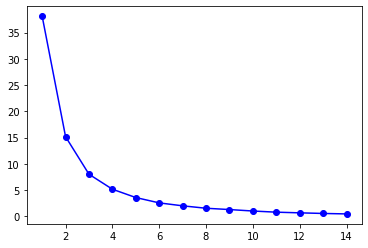

In [309]:
## elbow plot:
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],color='b',marker='o')

## We can see from the above elbow plot at K=3 the interia significantly decreases, the best value of K is 3.

In [365]:
## building the K-means clustering model with best K value 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=100)

kmeans.fit(df6)

KMeans(n_clusters=3, random_state=100)

In [366]:
## creating dataframe of label.
df_label = pd.DataFrame(kmeans.labels_, columns=['label'])

In [369]:
## joining the dataframes.
df6 = df6.join(df_label)

In [370]:
df6.head()

,density,pH,label
0,0.9978,3.51,1
1,0.9968,3.20,2
2,0.9970,3.26,0
3,0.9980,3.16,2
4,0.9978,3.51,1


In [371]:
df6['label'].value_counts()

0    801
2    495
1    303
Name: label, dtype: int64